In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

import utils
import methodprops
import plot_functions as fplot

In [2]:
resdir = "../dsc/results/"
plotdir = "boxplot_vs_cavi"

tf_pkl = os.path.join(resdir, "trendfiltering.pkl")

tf_df = pd.read_pickle(tf_pkl)
tf_df_order0 = tf_df[tf_df['simulate.dtrue'] == 0]
tf_df_order1 = tf_df[tf_df['simulate.dtrue'] == 1]

In [3]:
tf_df_order0

,simulate,simulate.n,simulate.sfix,simulate.snr,simulate.dtrue,fit,DSC,tfmse,niter,elbo,elboR,runtime_wall,runtime_cpu,runtime_dsc,convergence
0,changepoint,4096,10,5,0,mr_ash_init,1,0.004512,2000,-960.825702,-960.825702,208.847000,206.338000,209.012000,3
1,changepoint,4096,10,5,0,mr_ash_init,2,0.002341,2000,-1928.826059,-1928.826059,295.010000,199.952000,295.435000,3
2,changepoint,4096,10,5,0,mr_ash_init,3,0.004055,2000,-80.346539,-80.346539,206.885000,202.310000,207.006000,3
3,changepoint,4096,10,5,0,mr_ash_init,4,0.005306,2000,-580.670059,-580.670059,188.546000,187.761000,188.707000,3
4,changepoint,4096,10,5,0,mr_ash_init,5,0.008799,2000,-119.022366,-119.022366,185.441000,183.479000,185.648000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,changepoint,4096,10,5,0,gradvi_compound_scaled_init,46,0.002142,2000,-278.404036,-36.662982,797.988778,1237.930457,824.621718,4
246,changepoint,4096,10,5,0,gradvi_compound_scaled_init,47,0.000826,2000,266.168785,-1251.267983,777.359046,1347.072315,802.309979,4
247,changepoint,4096,10,5,0,gradvi_compound_scaled_init,48,0.003916,2000,-48.483472,1385.597161,750.172374,1501.313226,770.792575,4
248,changepoint,4096,10,5,0,gradvi_compound_scaled_init,49,0.000615,2000,-102.335258,-1844.830232,704.401948,1327.020170,728.126406,4


In [4]:
tf_df['fit'].unique()

array(['mr_ash_init', 'mr_ash_scaled_init', 'gradvi_direct_scaled_init',
       'gradvi_compound_init', 'gradvi_compound_scaled_init'],
      dtype=object)

In [5]:
primary_keys = ['simulate', 'simulate.n', 'simulate.sfix', 'simulate.snr', 'simulate.dtrue']
secondary_keys = ['DSC']
unique_keys = ['simulate.dtrue']

reference = 'mr_ash_init'
targets = ['mr_ash_init', 'mr_ash_scaled_init', 'gradvi_compound_init', 'gradvi_compound_scaled_init', 'gradvi_direct_scaled_init']

# MSE comparison

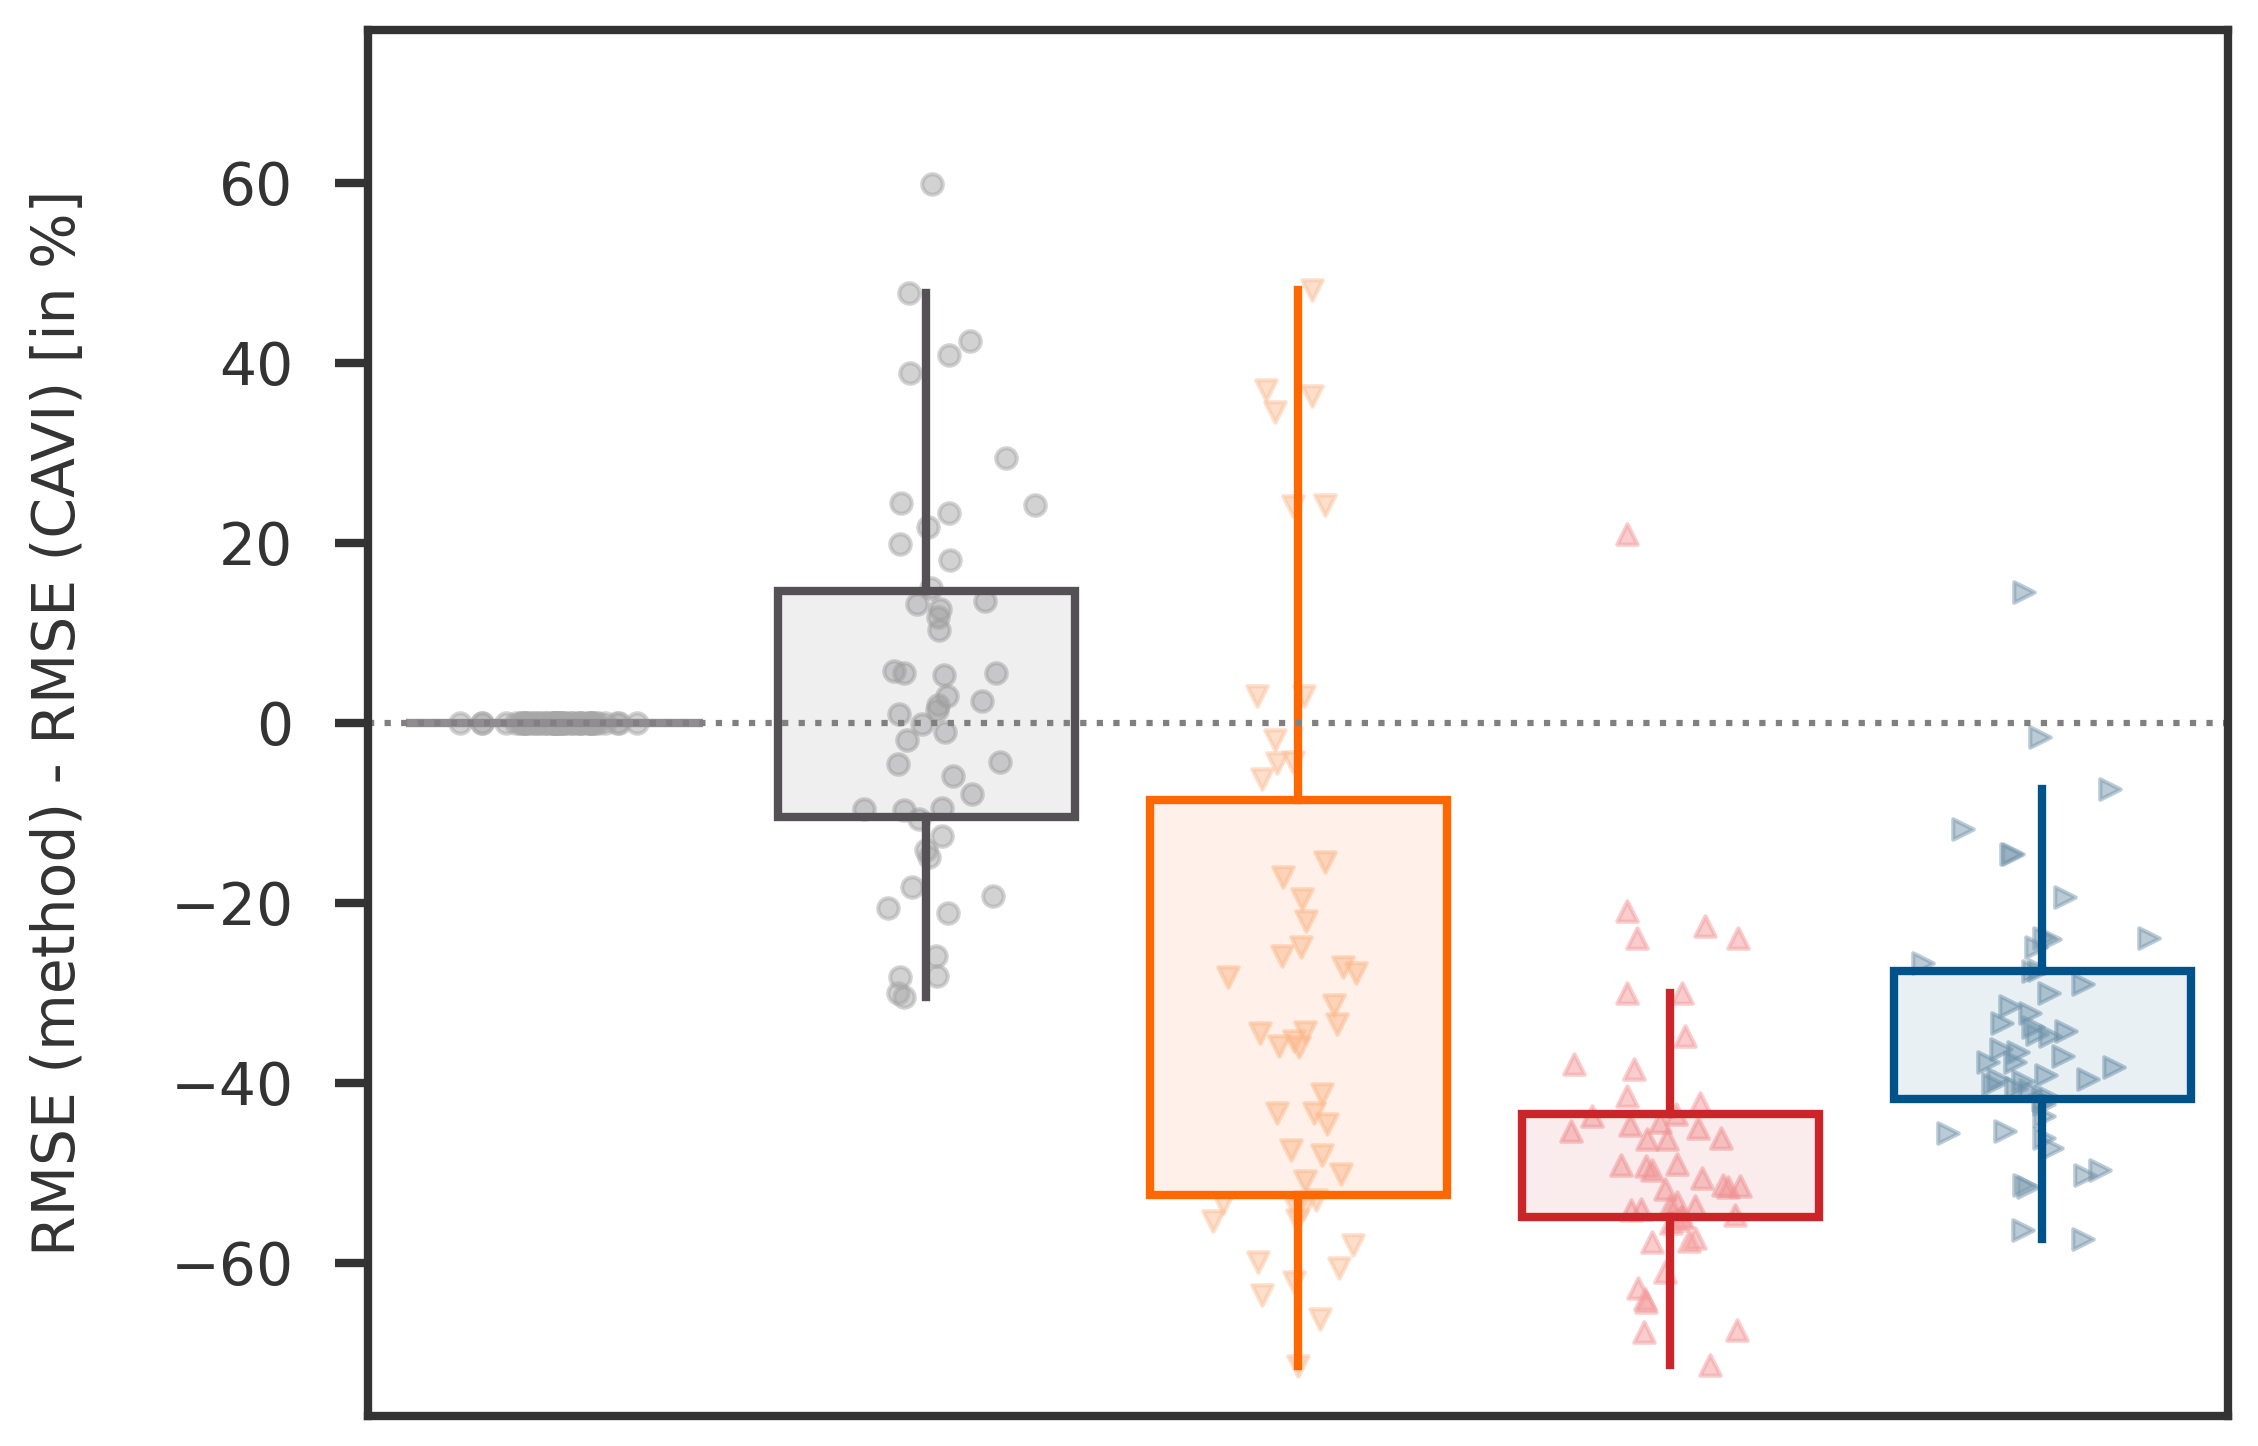

In [13]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/trendfiltering_mse_comparison_boxplot"
ylim = [-77, 77]
# ylim = None

df = utils.pivot_simulation_stat(tf_df, 'tfmse',
        primary_keys = primary_keys,
        secondary_keys = secondary_keys,
        unique_keys = unique_keys)

dfmod = df.copy(deep = True)
refv  = np.sqrt(df[reference])
for target in targets:
    dfmod[target] = 100 * (np.sqrt(df[target]) - refv) / refv
    
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)
remove_outliers = False
is_truncate = False

outlier_factor = [10. for x in targets]
outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets,
        xcol = 'simulate.dtrue',
        remove_outliers = remove_outliers, is_truncate = is_truncate,
        outlier_factor = outlier_factor, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("RMSE (method) - RMSE (CAVI) [in %]")
#ax1.set_xlabel("Degree of trendfiltering")
ax1.set_xticks([])
if ylim is not None:
    ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

# ELBO comparison

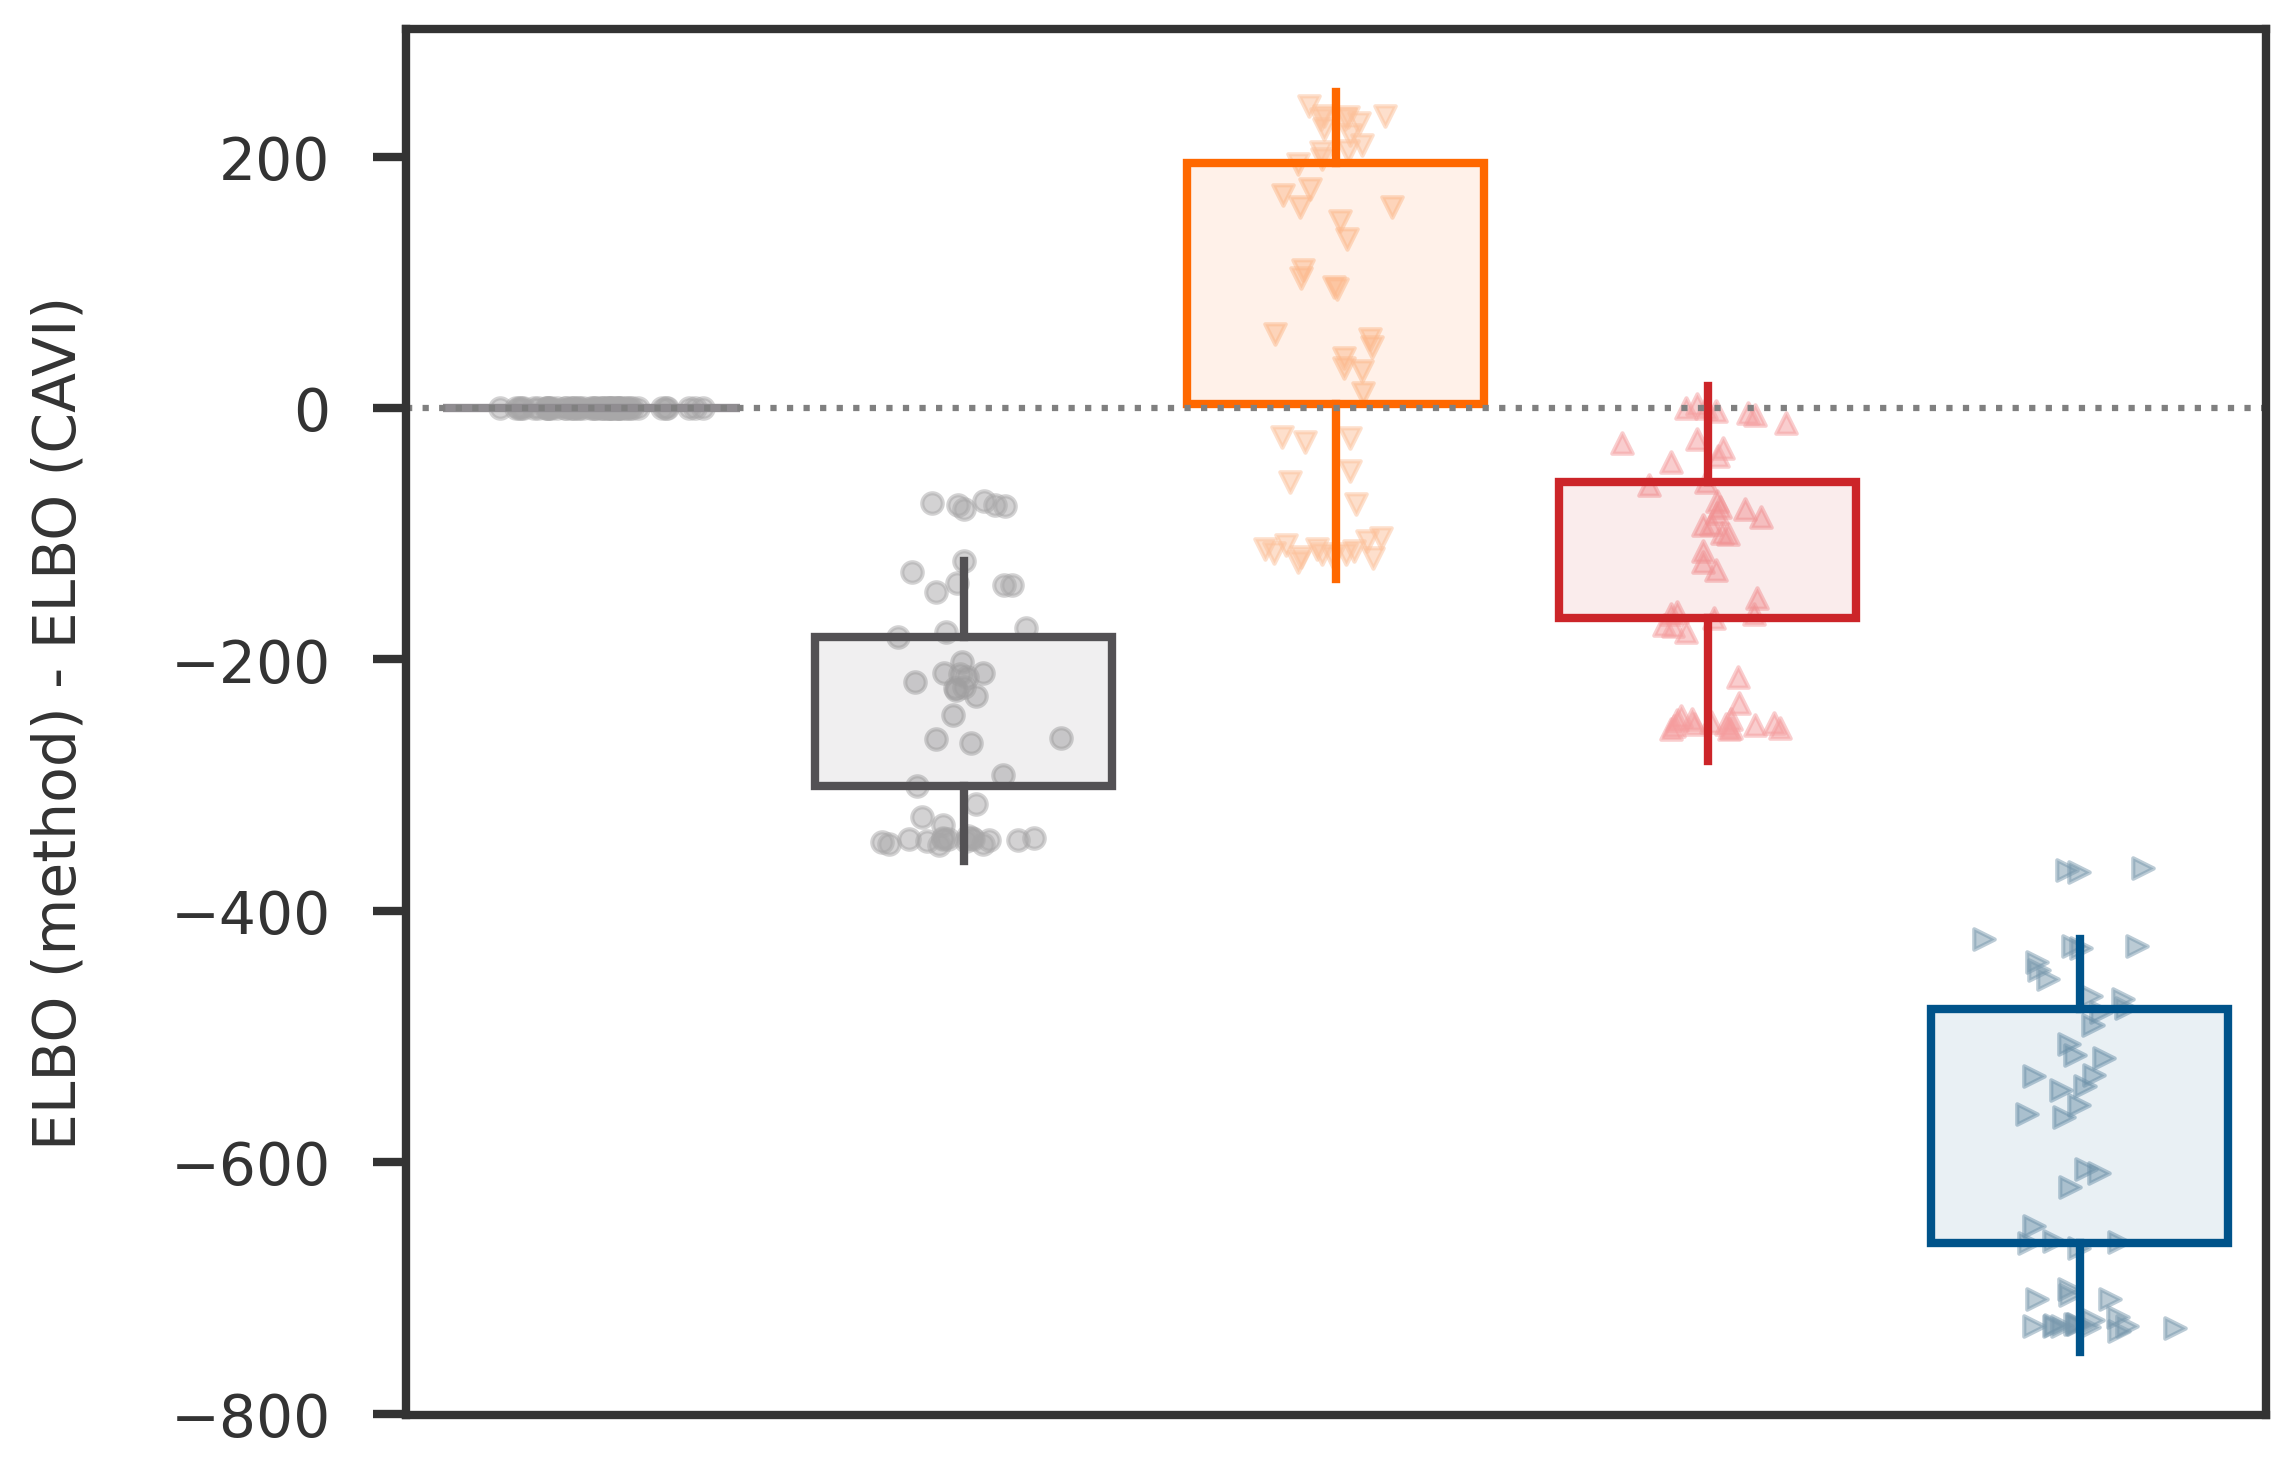

In [54]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/trendfiltering_elbo_comparison_boxplot"

ylim = None
#ylim = [-1020, 520]

df = utils.pivot_simulation_stat(tf_df, 'elboR',
        primary_keys = primary_keys,
        secondary_keys = secondary_keys,
        unique_keys = unique_keys)

dfmod = df.copy(deep = True)
for target in targets:
    dfmod[target] = -1. * (df[target] - df[reference])
    
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)
remove_outliers = True
is_truncate = True


outlier_factor = [1.0 for x in targets]
outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets,
        xcol = 'simulate.dtrue',
        remove_outliers = remove_outliers, is_truncate = is_truncate,
        outlier_factor = outlier_factor, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("ELBO (method) - ELBO (CAVI)")
#ax1.set_xlabel("Degree of trendfiltering")
ax1.set_xticks([])
if ylim is not None:
    ax1.set_ylim(ylim)


utils.saveplot(fig, plotprefix)
plt.show()

# Number of iterations

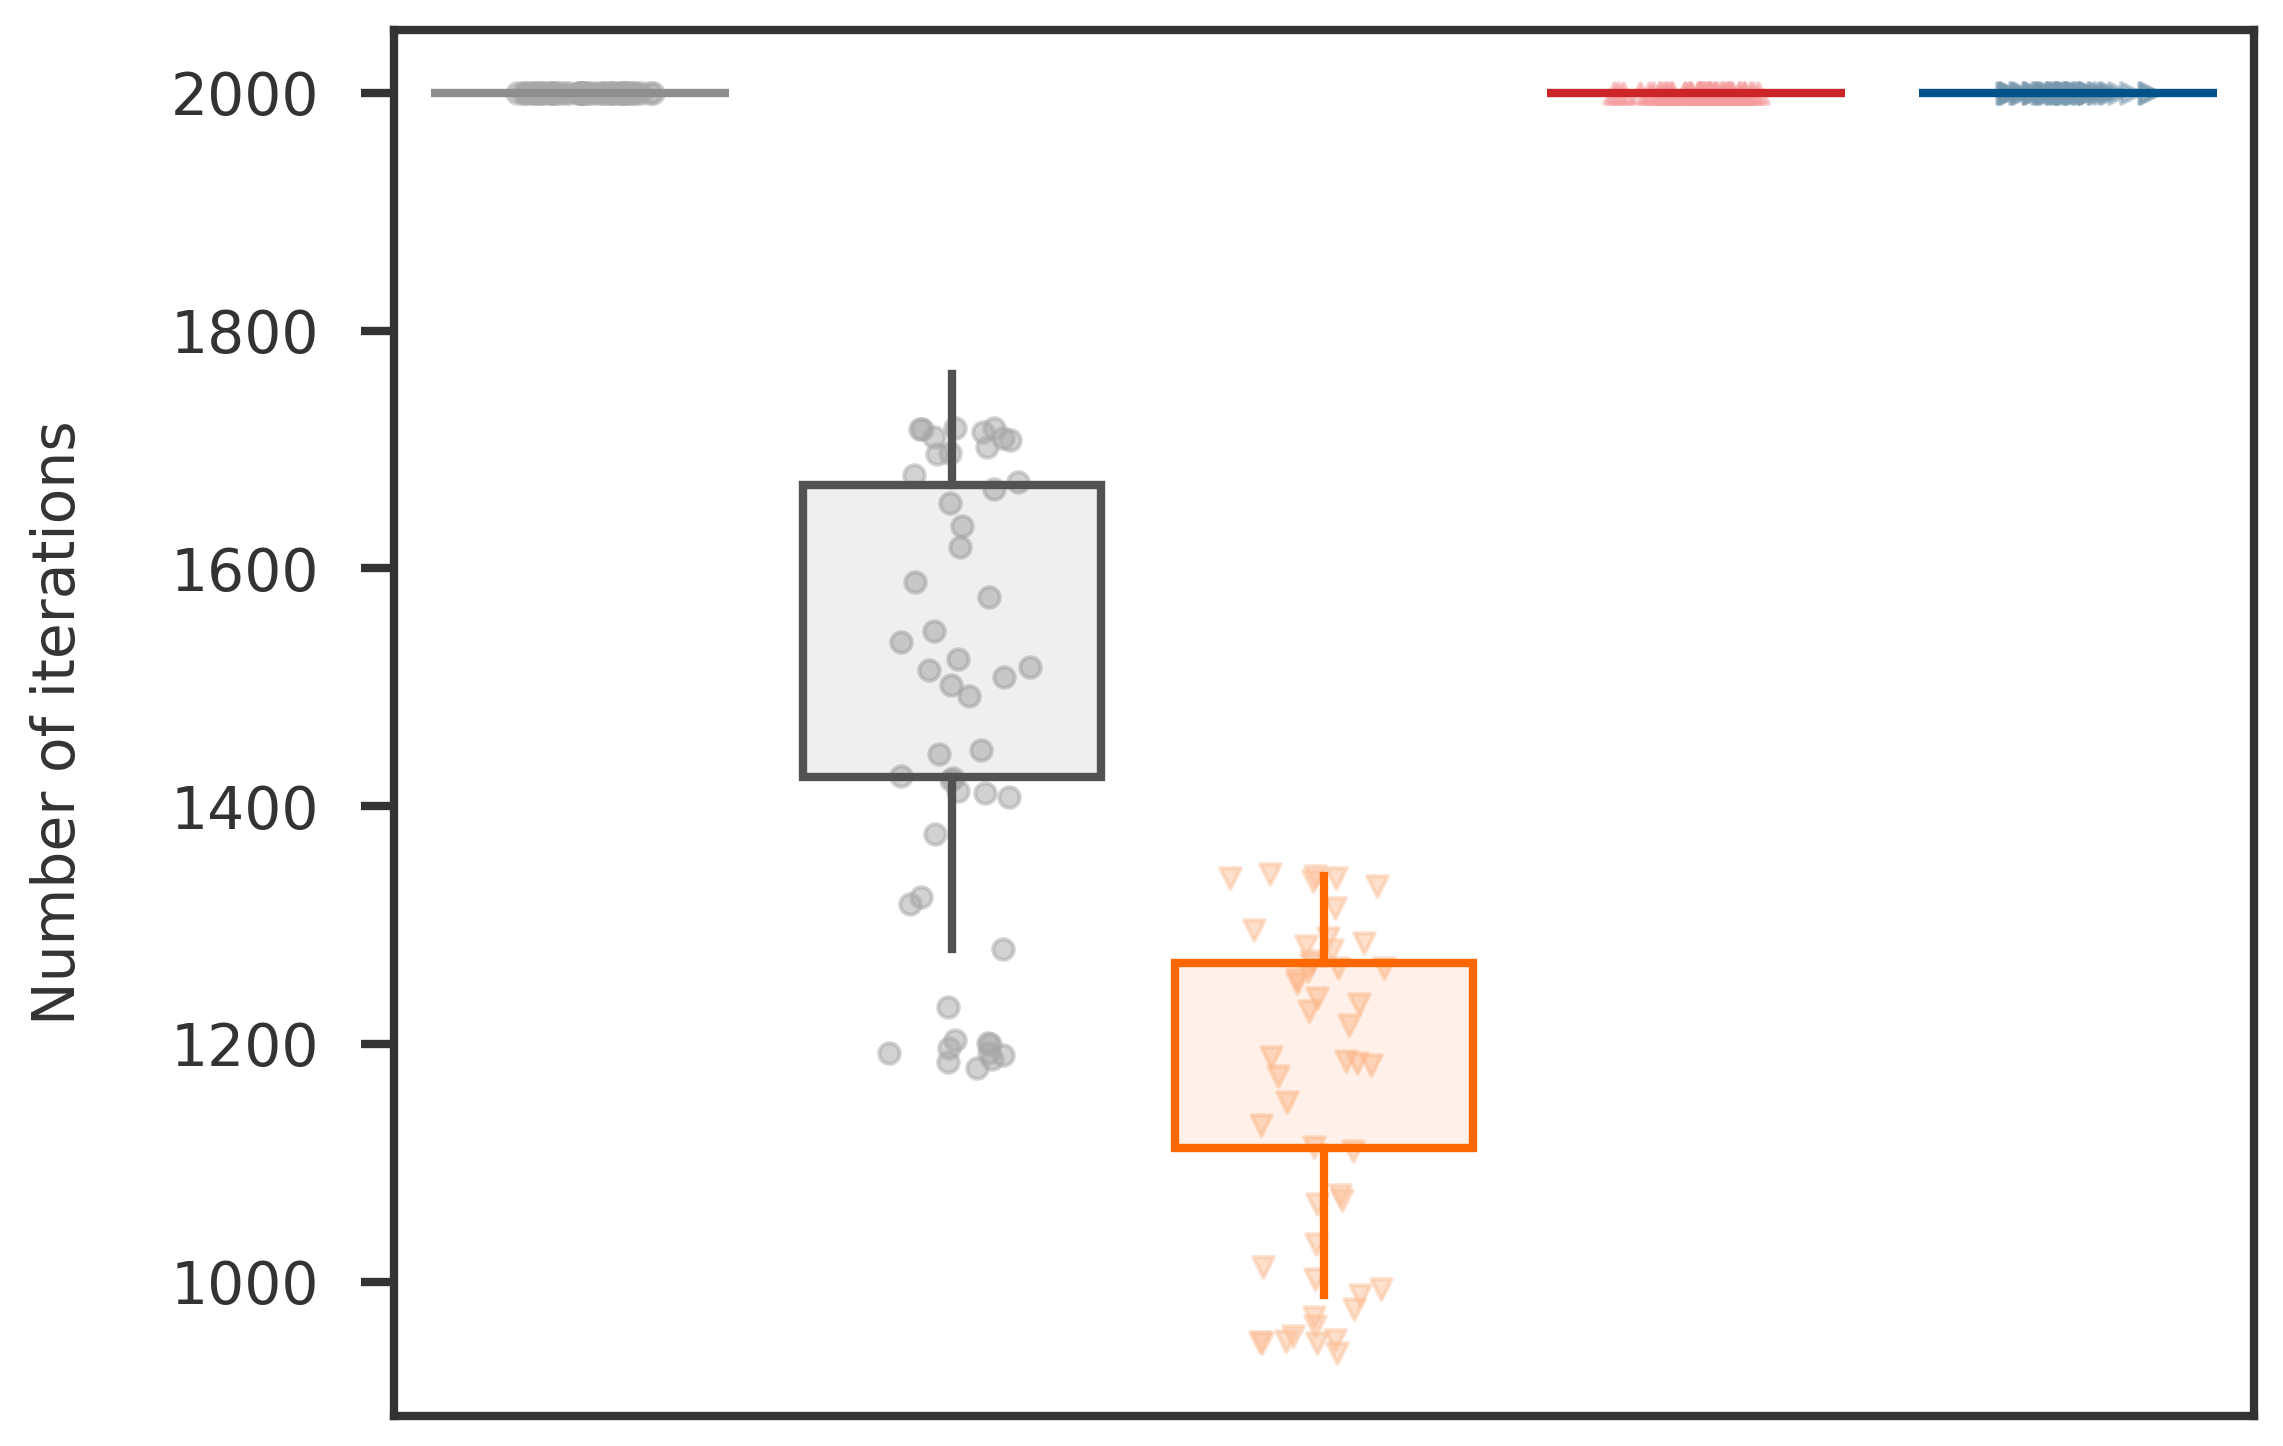

In [56]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/trendfiltering_niter_comparison_boxplot"
ylim = None

df = utils.pivot_simulation_stat(tf_df, 'niter',
        primary_keys = primary_keys,
        secondary_keys = secondary_keys,
        unique_keys = unique_keys)
    
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)
remove_outliers = True
is_truncate = True

outlier_factor = [1. for x in targets]
outliers = fplot.compare_methods_with_boxplots(ax1, df, targets,
        xcol = 'simulate.dtrue',
        remove_outliers = remove_outliers, is_truncate = is_truncate,
        outlier_factor = outlier_factor, ylim = ylim)

#ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("Number of iterations")
#ax1.set_xlabel("Degree of trendfiltering")
ax1.set_xticks([])
if ylim is not None:
    ax1.set_ylim(ylim)


utils.saveplot(fig, plotprefix)
plt.show()

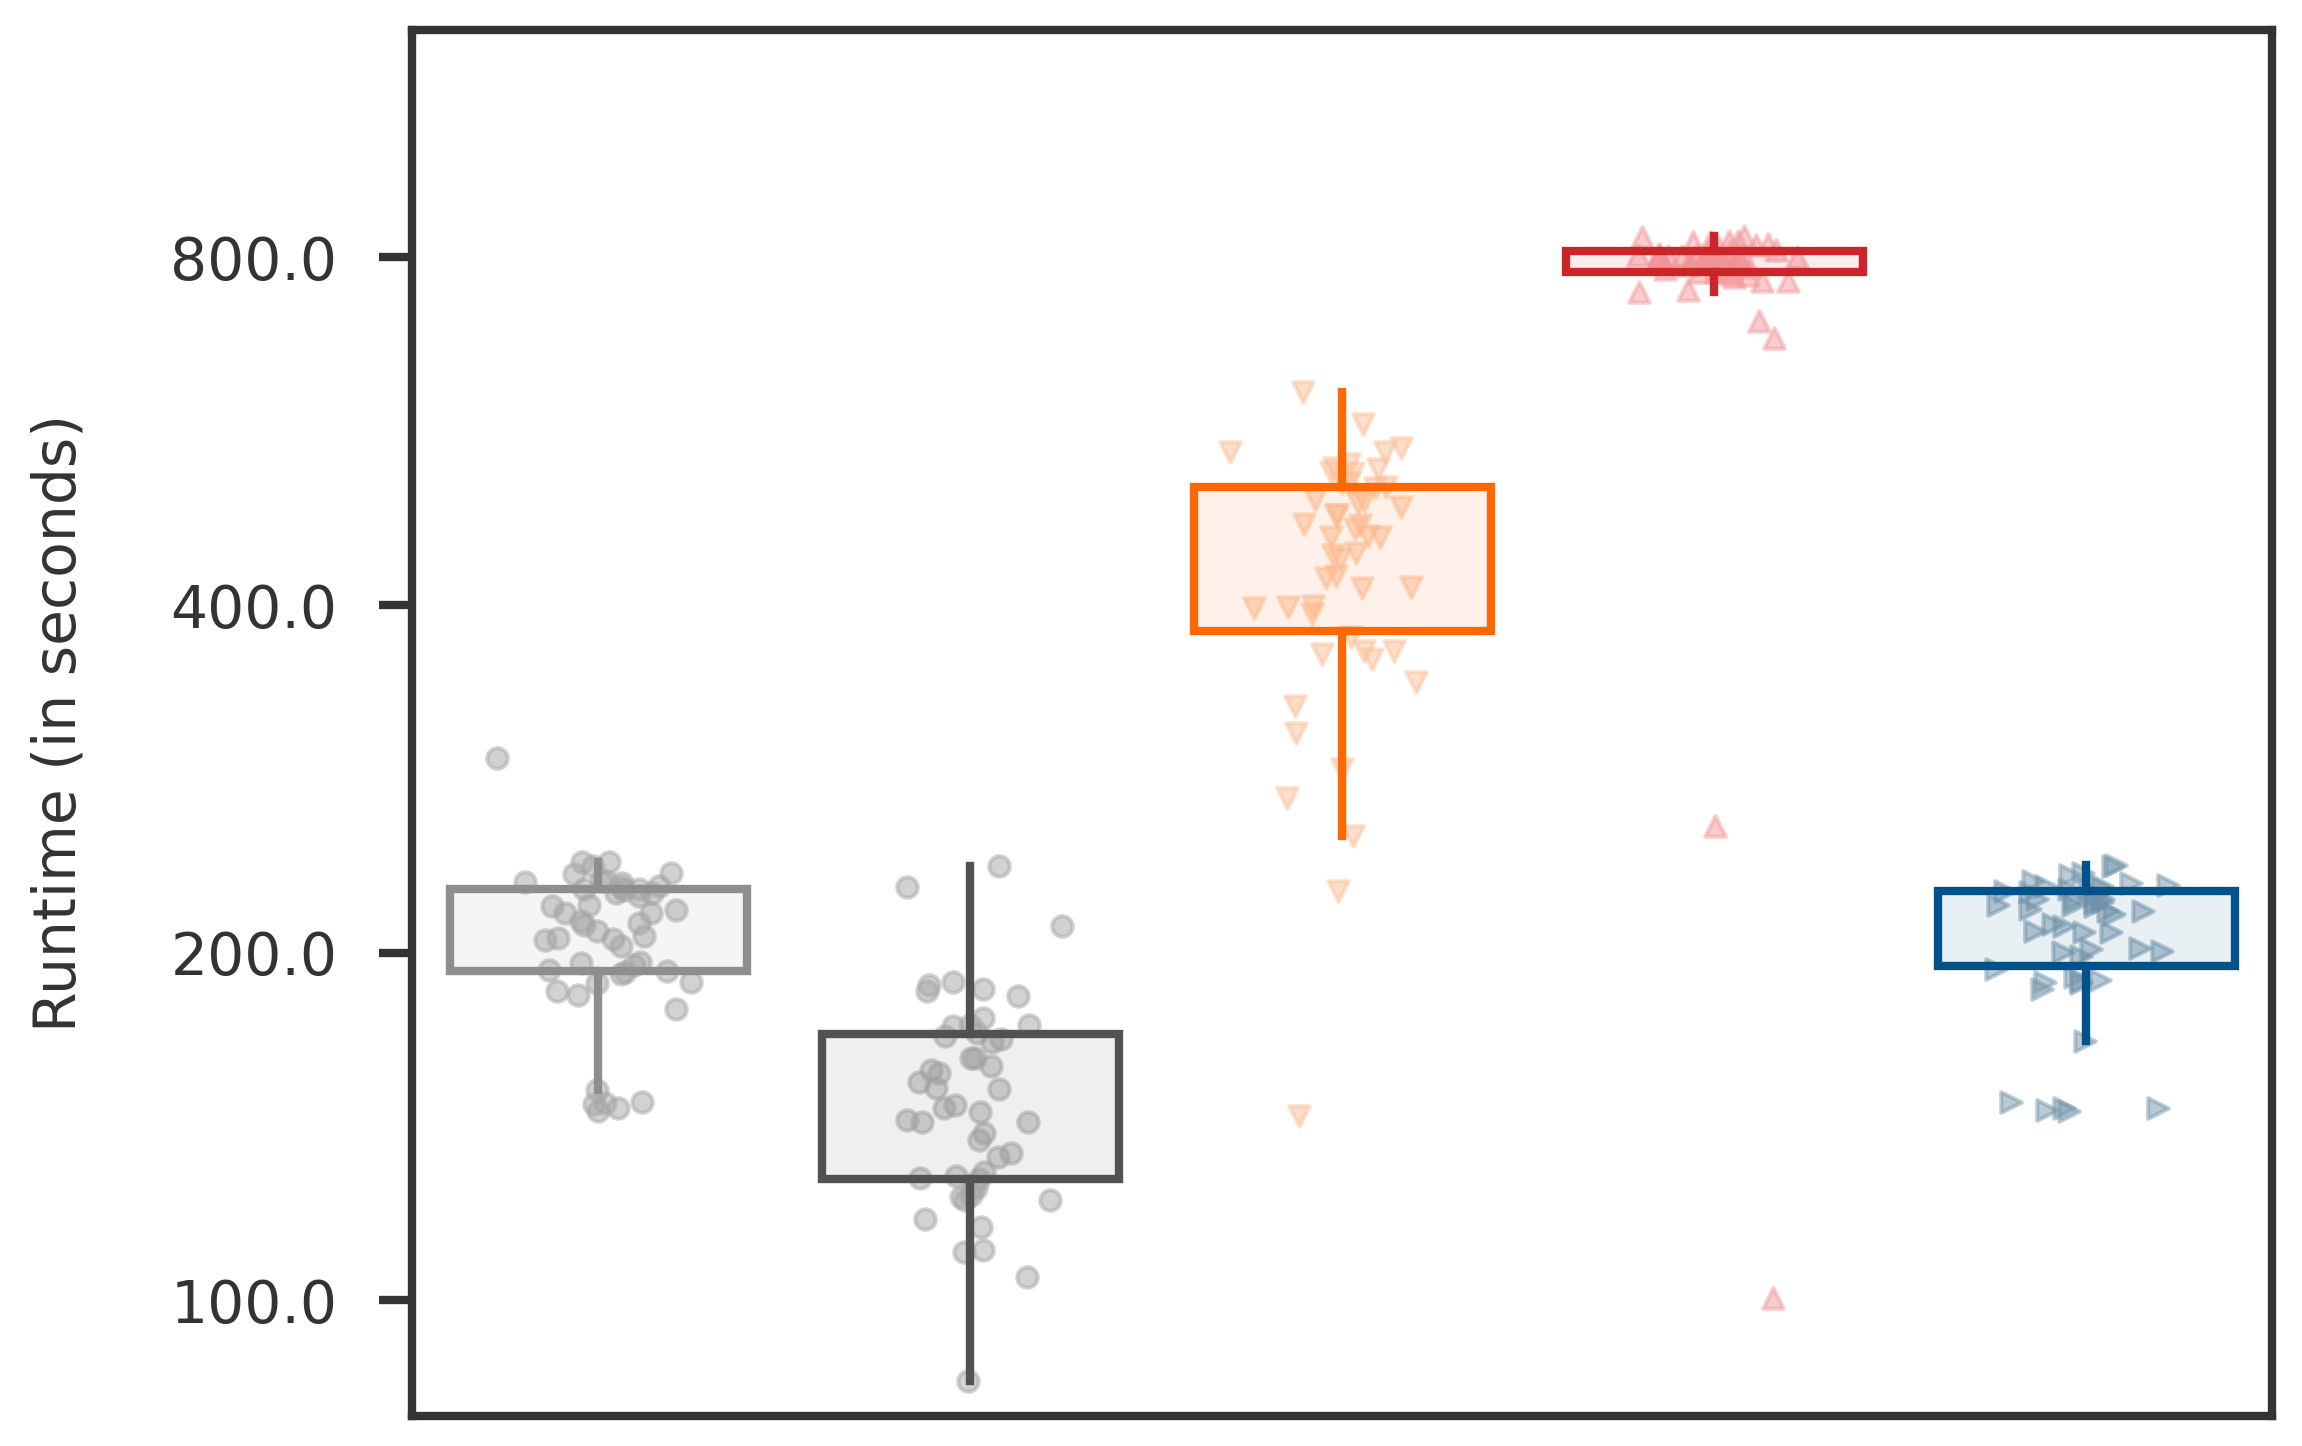

In [73]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/trendfiltering_runtime_comparison_boxplot"
ylim = None
ylim = [1.9, 3.1]

df = utils.pivot_simulation_stat(tf_df, 'runtime_wall',
        primary_keys = primary_keys,
        secondary_keys = secondary_keys,
        unique_keys = unique_keys)


dfmod = df.copy()
for target in targets:
    dfmod[target] = np.log10(df[target])
    
# dfmod.loc[dfmod['simulate.dtrue'] == 0, ['gradvi_compound_init']] = dfmod.loc[dfmod['simulate.dtrue'] == 0, ['gradvi_compound_init']].to_numpy() / 2.0
# dfmod.loc[dfmod['simulate.dtrue'] == 1, ['gradvi_compound_init']] = dfmod.loc[dfmod['simulate.dtrue'] == 1, ['gradvi_compound_init']].to_numpy() / 2.5
# dfmod.loc[dfmod['simulate.dtrue'] == 0, ['gradvi_compound_scaled_init']] = dfmod.loc[dfmod['simulate.dtrue'] == 0, ['gradvi_compound_scaled_init']].to_numpy() / 2.0
# dfmod.loc[dfmod['simulate.dtrue'] == 1, ['gradvi_compound_scaled_init']] = dfmod.loc[dfmod['simulate.dtrue'] == 1, ['gradvi_compound_scaled_init']].to_numpy() / 2.5

# dfmod.loc[:, ['gradvi_direct_scaled_init']] = dfmod.loc[:, ['gradvi_direct_scaled_init']].to_numpy() / 1.5
# dfmod.loc[dfmod['simulate.dtrue'] == 1, ['gradvi_direct_scaled_init']] = dfmod.loc[dfmod['simulate.dtrue'] == 1, ['gradvi_direct_scaled_init']].to_numpy() / 1.33

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)
remove_outliers = False
is_truncate = False

outlier_factor = [10. for x in targets]
outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets,
        xcol = 'simulate.dtrue',
        remove_outliers = remove_outliers, is_truncate = is_truncate,
        outlier_factor = outlier_factor, ylim = ylim)


ax1.set_ylabel("Runtime (in seconds)")
#ax1.set_xlabel("Degree of trendfiltering")
ax1.set_xticks([])

if ylim is not None:
    ax1.set_ylim(ylim)


mpl_utils.set_yticks(ax1, scale = 'log10', spacing = 'log10', tickmarks = [100.0, 200.0, 400.0, 800.0])
utils.saveplot(fig, plotprefix)
plt.show()

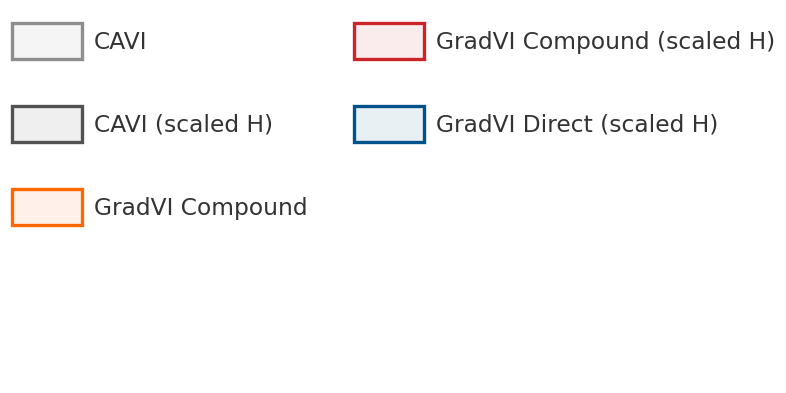

In [59]:
from matplotlib.patches import Patch
import methodprops

plotprefix = "trendfiltering_boxplot_legend"

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)
plotmeta = methodprops.plot_metainfo()

fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(111)

for side, border in ax1.spines.items():
    border.set_visible(False)
ax1.tick_params(bottom = False, top = False, left = False, right = False,
    labelbottom = False, labeltop = False, labelleft = False, labelright = False)

mlabels = []
mhandles = []
for target in targets:
    boxcolor = plotmeta[target].color
    boxface = f'#{boxcolor[1:]}16'
    boxlabel = plotmeta[target].label
    handle = Patch(facecolor = boxface, edgecolor = boxcolor, label = boxlabel, lw = 2)
    mhandles.append(handle)
    mlabels.append(boxlabel)
    
leg = ax1.legend(handles = mhandles, labels = mlabels, ncols = 2, 
                 handlelength = 3, handleheight = 2,
                 labelspacing = 2,
                 loc = 'upper center')

utils.saveplot(fig, plotprefix)
plt.show()